In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [307]:
cols = ['dateTime','participant','view','commandType']
viewstoKeep = ['home_view','over_view','annotate'] 

group1Participants = ['10', '11','12','13'] 
startAnnotation = datetime.datetime(2023,3,30,0,0,0,0) 
startCoordination = datetime.datetime(2023,4,21,0,0,0,0) 

#     parse_dates=['dateTime'])

# Step1. 'Manually' Cleaned logs with Regex: 
# Traceback \(most recent call last\):(?:\n.*)+?\n(.*?(?:Exception|Error):)\s*(.+) as found from 
# https://stackoverflow.com/questions/53658695/how-to-match-the-whole-traceback-message-and-not-stop-early-using-regex
# Then removed double extra lines and 1 extra sentece.

logs0 = pd.read_csv("usage.log", header=None, names=cols)
logs1 = pd.read_csv("usage.log.2023-04-04", header=None, names=cols)
logs2 = pd.read_csv("usage.log.2023-04-12",  header=None, names=cols)
logs3 = pd.read_csv("usage.log.2023-04-20",  header=None, names=cols)
logs4 = pd.read_csv("usage.log.2023-04-30",  header=None, names=cols)

logs = pd.concat([logs0,logs1,logs2,logs3,logs4])

logs = pd.DataFrame(logs)

logs[['A','dateTime']] = logs['dateTime'].str.split(r'|', 1, expand=True)               
logs[['LogType','dateTime']] = logs['dateTime'].str.split('2023',1, expand=True)    
logs['dateTime'] = '2023' + logs['dateTime'].astype(str)

# Do not analyse WARNINGS or ERRORS here
logs = logs.loc[logs['LogType'] == ' INFO ' ] 

logs[['B','participant']] = logs['participant'].str.split(':', 1, expand=True)
logs[['C','view']] = logs['view'].str.split(':', 1, expand=True)
logs[['commandType','commandParameters']] = logs['commandType'].str.split(':', 1, expand=True)
del logs['A']
del logs['B']
del logs['C']

logs['dateTime'] = pd.to_datetime(logs['dateTime'],infer_datetime_format=True)
logs['view'] = logs['view'].str.replace('"', '') 
logs['view'] = logs['view'].str.replace(' ', '') 
logs['participant'] = logs['participant'].str.replace('"', '') 
logs['participant'] = logs['participant'].str.replace(' ', '') 
logs['commandType'] = logs['commandType'].str.replace('"', '') 

logs['participant'].astype(str)
logs['view'].astype(str)

logs = logs.loc[logs['participant'].isin(group1Participants)] 
logs = logs.loc[logs['view'].isin(viewstoKeep)] 
logs = logs.loc[logs['dateTime'] >= startAnnotation ] 

logs

,dateTime,participant,view,commandType,LogType,commandParameters
0,2023-05-08 09:22:56,11,over_view,GET,INFO,{}
1,2023-05-08 09:22:56,11,over_view,GET,INFO,{}
10,2023-05-08 09:23:54,11,home_view,GET,INFO,{}
11,2023-05-08 09:23:54,11,home_view,GET,INFO,{}
18,2023-05-08 09:29:54,10,home_view,GET,INFO,{}
...,...,...,...,...,...,...
3084,2023-05-07 20:04:02,10,home_view,GET,INFO,{}
3097,2023-05-07 20:05:41,10,over_view,GET,INFO,{}
3098,2023-05-07 20:05:41,10,over_view,GET,INFO,{}
3109,2023-05-07 20:06:26,10,home_view,GET,INFO,{}


In [308]:
pp = logs.groupby(['participant','view',logs.dateTime.dt.date])
ff = pp.agg({'commandParameters':'count'})
(ff)

commandParameters
participant view      dateTime                     
10          annotate  2023-03-30                 18
                      2023-03-31                  2
                      2023-04-01                  4
                      2023-04-02                  4
                      2023-04-04                  2
...                                             ...
13          home_view 2023-05-01                  4
                      2023-05-02                  8
                      2023-05-03                  2
            over_view 2023-04-01                  2
                      2023-04-28                  2

[185 rows x 1 columns]

array([[<AxesSubplot:title={'center':'annotate'}, xlabel='dateTime'>],
       [<AxesSubplot:title={'center':'home_view'}, xlabel='dateTime'>],
       [<AxesSubplot:title={'center':'over_view'}, xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>]], dtype=object)

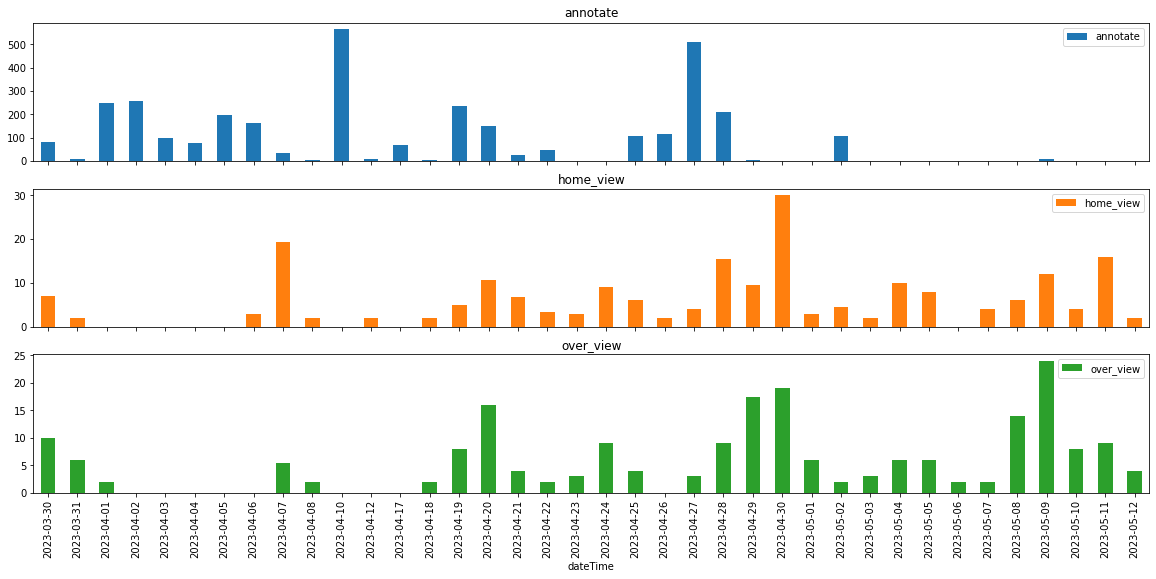

In [310]:
pd.pivot_table(ff.reset_index(),
               index='dateTime', columns='view', values='commandParameters'
              ).plot.bar(subplots=True, layout=(10,1),figsize=(20, 30))

array([[<AxesSubplot:title={'center':'10'}, xlabel='dateTime'>],
       [<AxesSubplot:title={'center':'11'}, xlabel='dateTime'>],
       [<AxesSubplot:title={'center':'12'}, xlabel='dateTime'>],
       [<AxesSubplot:title={'center':'13'}, xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>]], dtype=object)

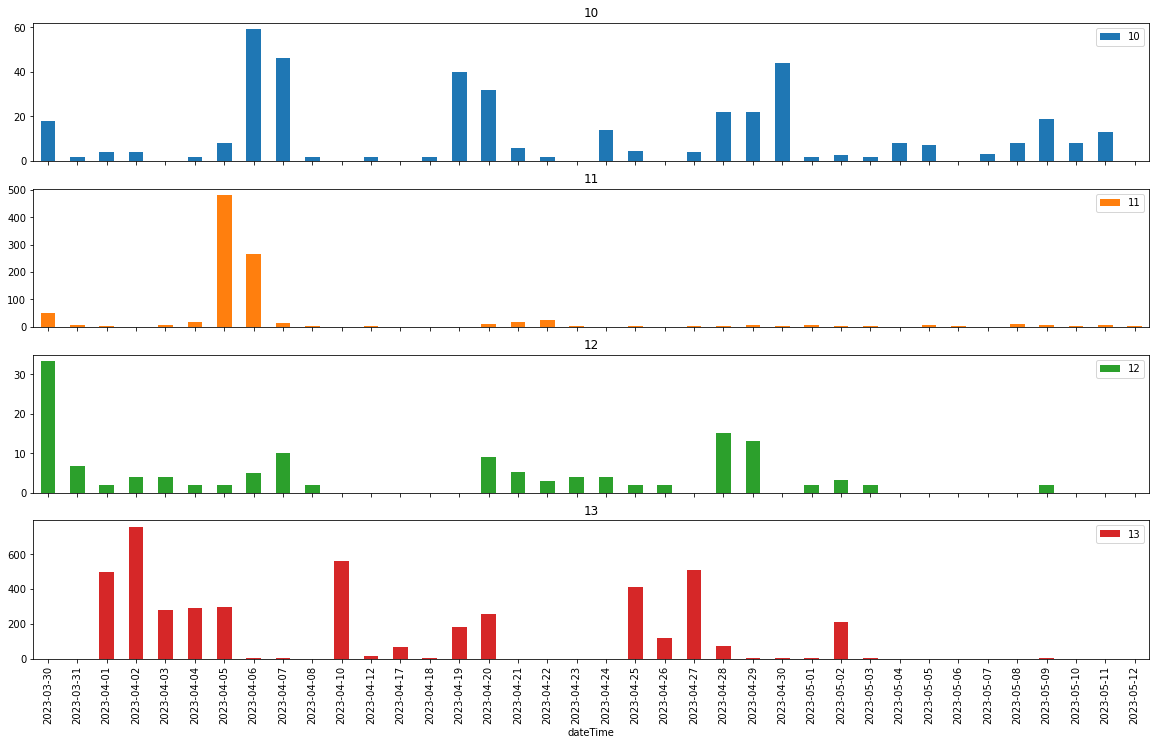

In [297]:
pd.pivot_table(ff.reset_index(),
               index='dateTime', columns='participant', values='commandParameters'
              ).plot.bar(subplots=True, layout=(10,1),figsize=(20, 30))#,ylim=[0,600])

array([[<AxesSubplot:title={'center':' GET'}, xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>],
       [<AxesSubplot:xlabel='dateTime'>]], dtype=object)

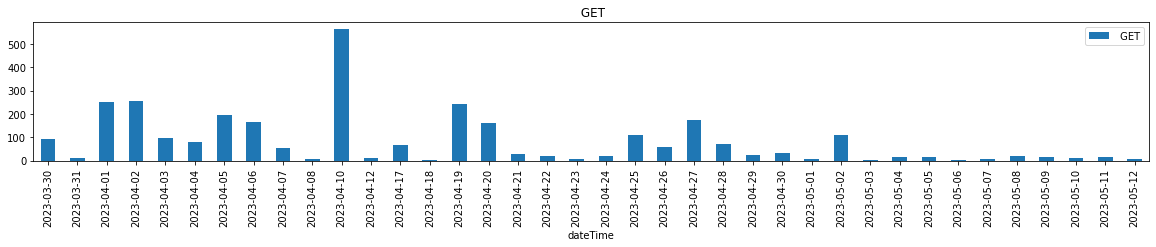

In [314]:
pp = logs.groupby(['participant','commandType',logs.dateTime.dt.date])
ff = pp.agg({'commandParameters':'count'})
pd.pivot_table(ff.reset_index(),
               index='dateTime', columns='commandType', values='commandParameters'
              ).plot.bar(subplots=True, layout=(10,1),figsize=(20, 30))